In [1]:
import numpy as np
import pandas as pd
import re
import csv
import spacy
import matplotlib.pyplot as plt
%pprint

Pretty printing has been turned OFF


In [2]:
nlp = spacy.load('ru_core_news_sm')

In [3]:
# I read in my txt version of the textbook dictionary using utf-8 encoding and I'm able to read it in as a list of
# lowercased russian words their page number and definition.
nti = open('./textbook_vocab_data/novice_to_intermediate.txt', encoding= 'utf8')
nti = nti.read() 
nti[:2000] # very messy ugh

'Авария 13 – traffic accident\nавтобус 12 – bus\nавтомобиль 12 – car\nавтомойка 13 – car wash\nаксессуары 13, 15 – accessories\nалкогольный напиток 16 – alcoholic drink\nаллергия 16 – allergy\nальпинизм 10 – mountain climbing\nангина 16 – strep throat\nанкета 14 – application form\nапельсин 5 – orange\nарбуз 5 – watermelon\nаренда 11 – rent n.\nаспирантура 1 – graduate school\nафиша 10 – poster\nБанан 5 – banana\nбанкомат 13 – ATM\nбарабаны 10 – drums\nбаскетбол 10 – basketball\nбег 10 – running\nбежать ~ бегать 12 – to run\nбез (+ gen.) 3 – without\nбезветренный 15 – windless, calm\nбелок (pl. белки) 5 – protein\nбензин 13 – gasoline\nберег (prep.: на берегу) 1 – сoast, shore\nбесплатный 14 – free\nбеспокоить (impf. кого?) 16 – to bother, disturb\nбеспокоиться (impf. о ком? о чём? за кого? за что? colloq.) 16 – to worry, be worried\nбижутерия 13 – jewelry\nблин (pl. -ы) 6 – pancake\nблокнот 7 – notebook\nблондин 2 – blond (man) \nблондинка 2 – blonde (woman)\nблузка 15 – blouse\nблюдо

In [4]:
nti_txt = nti.split('\n') # I turn the file into a list, splitting on linebreaks to divide most of the vocab items
nti_txt_low = [x.lower() for x in nti_txt] # Stress marking was encoded with capital letters, so I lower everything
ntiplay = nti_txt_low[:30] # let't take a look at some of the entries and make it a play set
ntiplay

['авария 13 – traffic accident', 'автобус 12 – bus', 'автомобиль 12 – car', 'автомойка 13 – car wash', 'аксессуары 13, 15 – accessories', 'алкогольный напиток 16 – alcoholic drink', 'аллергия 16 – allergy', 'альпинизм 10 – mountain climbing', 'ангина 16 – strep throat', 'анкета 14 – application form', 'апельсин 5 – orange', 'арбуз 5 – watermelon', 'аренда 11 – rent n.', 'аспирантура 1 – graduate school', 'афиша 10 – poster', 'банан 5 – banana', 'банкомат 13 – atm', 'барабаны 10 – drums', 'баскетбол 10 – basketball', 'бег 10 – running', 'бежать ~ бегать 12 – to run', 'без (+ gen.) 3 – without', 'безветренный 15 – windless, calm', 'белок (pl. белки) 5 – protein', 'бензин 13 – gasoline', 'берег (prep.: на берегу) 1 – сoast, shore', 'бесплатный 14 – free', 'беспокоить (impf. кого?) 16 – to bother, disturb', 'беспокоиться (impf. о ком? о чём? за кого? за что? colloq.) 16 – to worry, be worried', 'бижутерия 13 – jewelry']

It was ultimately easier to use a less coding-intensive solution to end up with a txt file that I can read into this environment. I'm going to try to keep the russian vocabulary item and its english definition so I'll try to get rid of some of the formatting weirdness with regular expressions. I will have to be careful with these extended definitions that continue on to multiple lines

In [5]:
# First, We need to get rid of any page numbers and extraneous white spaces
ntiplay = [re.sub('(\s\d+,|\s\d+\s|\|)', ' ', x) for x in ntiplay]
ntiplay

['авария – traffic accident', 'автобус – bus', 'автомобиль – car', 'автомойка – car wash', 'аксессуары  – accessories', 'алкогольный напиток – alcoholic drink', 'аллергия – allergy', 'альпинизм – mountain climbing', 'ангина – strep throat', 'анкета – application form', 'апельсин – orange', 'арбуз – watermelon', 'аренда – rent n.', 'аспирантура – graduate school', 'афиша – poster', 'банан – banana', 'банкомат – atm', 'барабаны – drums', 'баскетбол – basketball', 'бег – running', 'бежать ~ бегать – to run', 'без (+ gen.) – without', 'безветренный – windless, calm', 'белок (pl. белки) – protein', 'бензин – gasoline', 'берег (prep.: на берегу) – сoast, shore', 'бесплатный – free', 'беспокоить (impf. кого?) – to bother, disturb', 'беспокоиться (impf. о ком? о чём? за кого? за что? colloq.) – to worry, be worried', 'бижутерия – jewelry']

In [6]:
# let's make this into a dataframe and see what we can do
df_ntiplay=pd.DataFrame(ntiplay,columns=['Entry'])
df_ntiplay

,Entry
0,авария – traffic accident
1,автобус – bus
2,автомобиль – car
3,автомойка – car wash
4,аксессуары – accessories
5,алкогольный напиток – alcoholic drink
6,аллергия – allergy
7,альпинизм – mountain climbing
8,ангина – strep throat
9,анкета – application form


In [7]:
df_ntiplay = df_ntiplay.join(df_ntiplay['Entry'].str.split('–', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_ntiplay

,Entry,Russian,English
0,авария – traffic accident,авария,traffic accident
1,автобус – bus,автобус,bus
2,автомобиль – car,автомобиль,car
3,автомойка – car wash,автомойка,car wash
4,аксессуары – accessories,аксессуары,accessories
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink
6,аллергия – allergy,аллергия,allergy
7,альпинизм – mountain climbing,альпинизм,mountain climbing
8,ангина – strep throat,ангина,strep throat
9,анкета – application form,анкета,application form


In [8]:
df_ntiplay['Extra'] = df_ntiplay['Russian'].str.extract('(\(.*?\))', expand=True)
df_ntiplay = df_ntiplay.fillna('')
df_ntiplay

,Entry,Russian,English,Extra
0,авария – traffic accident,авария,traffic accident,
1,автобус – bus,автобус,bus,
2,автомобиль – car,автомобиль,car,
3,автомойка – car wash,автомойка,car wash,
4,аксессуары – accessories,аксессуары,accessories,
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink,
6,аллергия – allergy,аллергия,allergy,
7,альпинизм – mountain climbing,альпинизм,mountain climbing,
8,ангина – strep throat,ангина,strep throat,
9,анкета – application form,анкета,application form,


In [9]:
df_ntiplay['Russian'] = df_ntiplay['Russian'].replace('(\(.*?\))', '', regex=True)
df_ntiplay

,Entry,Russian,English,Extra
0,авария – traffic accident,авария,traffic accident,
1,автобус – bus,автобус,bus,
2,автомобиль – car,автомобиль,car,
3,автомойка – car wash,автомойка,car wash,
4,аксессуары – accessories,аксессуары,accessories,
5,алкогольный напиток – alcoholic drink,алкогольный напиток,alcoholic drink,
6,аллергия – allergy,аллергия,allergy,
7,альпинизм – mountain climbing,альпинизм,mountain climbing,
8,ангина – strep throat,ангина,strep throat,
9,анкета – application form,анкета,application form,


In [10]:
nti_sub = [re.sub('(\s\d+,|\s\d+\s|\|| 3| 3)', ' ', x) for x in nti_txt_low]
df_nti=pd.DataFrame(nti_sub,columns=['Entry'])
df_nti=df_nti.join(df_nti['Entry'].str.split('–', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_nti['Extra'] = df_nti['Russian'].str.extract('(\(.*?\))', expand=True)
df_nti = df_nti.fillna('')
df_nti['Russian'] = df_nti['Russian'].replace('(\(.*?\))', '', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('а́', 'а', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('е́', 'е', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('ы́', 'ы', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('и́', 'и', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('у́', 'у', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('ю́', 'ю', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('о́', 'о', regex=True)
df_nti['Russian'] = df_nti['Russian'].replace('я́', 'я', regex=True)
df_nti=df_nti[['Russian','English','Extra']]
df_nti.tail()

,Russian,English,Extra
914,яблоко,apple,
915,являться,to be (in official or formal contexts),(impf. кем? чем?)
916,ягода,berry,
917,яичница,fried eggs,
918,яркий,bright,"(-ая, -ое, -ие)"


In [11]:
df_nti['Level'] = 'Int'
df_nti

,Russian,English,Extra,Level
0,авария,traffic accident,,Int
1,автобус,bus,,Int
2,автомобиль,car,,Int
3,автомойка,car wash,,Int
4,аксессуары,accessories,,Int
...,...,...,...,...
914,яблоко,apple,,Int
915,являться,to be (in official or formal contexts),(impf. кем? чем?),Int
916,ягода,berry,,Int
917,яичница,fried eggs,,Int


In [12]:
ita = open('./textbook_vocab_data/intermediate_to_advanced.txt', encoding= 'utf8')
ita = ita.read()
ita[:2000] # very messy ugh

"АбсолЮтно 3 - absolutely \nаварИйное состоЯние 5 - unsafe condition \nакварель (f) 3 - watercolor \nаккуратный 2 - neat, tidy, well organized; orderly \nактуально 1 - timely \nакция (акции) 9 - share (stocks) \nальтернатИва 6 - alternative \nамфитеатр 3 - (raised) rear part in orchestra section (theater) \nанализИровать/проанализИровать (что?) 1 - to analyze \nангина 7 - strep throat \nантракт 3 - intermission \nаполитИчность 6 - indifference towards politics \nаттестат 1 - high school diploma \nБаловать/избаловать (кого?) 4 - to indulge, to pamper \nбедность 4 - poverty \nбездельничать 2 - to loaf, not do anything \nбездомный 5 - homeless \nбезопасность 4 - security \nбезработица 2 - unemployment, joblessness \nбезработный (n.) 2 - unemployed (person) \nбезразлИчный 6 - indifferent \nбезусловно 1 - unconditionally; for sure \nбелкИ (sing. белoк) 7 - proteins \nбельэтаж 3 - dress circle; first tier \nбензИн 9 - gas (gasoline) \nберечь  (impf кого?) 4 - to take good care of \nбеспокоит

In [13]:
ita_txt = ita.split('\n') # I turn the file into a list, splitting on linebreaks to divide most of the vocab items
ita_txt_low = [x.lower() for x in ita_txt] # Stress marking was encoded with capital letters, so I lower everything
itaplay = ita_txt_low[:30] # let't take a look at some of the entries and make it a play set
itaplay

['абсолютно 3 - absolutely ', 'аварийное состояние 5 - unsafe condition ', 'акварель (f) 3 - watercolor ', 'аккуратный 2 - neat, tidy, well organized; orderly ', 'актуально 1 - timely ', 'акция (акции) 9 - share (stocks) ', 'альтернатива 6 - alternative ', 'амфитеатр 3 - (raised) rear part in orchestra section (theater) ', 'анализировать/проанализировать (что?) 1 - to analyze ', 'ангина 7 - strep throat ', 'антракт 3 - intermission ', 'аполитичность 6 - indifference towards politics ', 'аттестат 1 - high school diploma ', 'баловать/избаловать (кого?) 4 - to indulge, to pamper ', 'бедность 4 - poverty ', 'бездельничать 2 - to loaf, not do anything ', 'бездомный 5 - homeless ', 'безопасность 4 - security ', 'безработица 2 - unemployment, joblessness ', 'безработный (n.) 2 - unemployed (person) ', 'безразличный 6 - indifferent ', 'безусловно 1 - unconditionally; for sure ', 'белки (sing. белoк) 7 - proteins ', 'бельэтаж 3 - dress circle; first tier ', 'бензин 9 - gas (gasoline) ', 'беречь

In [14]:
ita_sub = [re.sub('(\s\d+,|\s\d+\s|\|| 3| 3)', ' ', x) for x in ita_txt_low]
df_ita=pd.DataFrame(ita_sub,columns=['Entry'])
df_ita=df_ita.join(df_ita['Entry'].str.split('-', 1, expand=True).rename(columns={0:'Russian', 1:'English'}))
df_ita['Extra'] = df_ita['Russian'].str.extract('(\(.*?\))', expand=True)
df_ita = df_ita.fillna('')
df_ita['Russian'] = df_ita['Russian'].replace('(\(.*?\))', '', regex=True)
df_ita=df_ita[['Russian','English','Extra']]
df_ita

,Russian,English,Extra
0,абсолютно,absolutely,
1,аварийное состояние,unsafe condition,
2,акварель,watercolor,(f)
3,аккуратный,"neat, tidy, well organized; orderly",
4,актуально,timely,
...,...,...,...
1195,язва,ulcer,
1196,яма,pothole,
1197,яркий,bright,
1198,яркие огни,bright lights,


In [15]:
df_ita['Level'] = 'Adv'
df_ita

,Russian,English,Extra,Level
0,абсолютно,absolutely,,Adv
1,аварийное состояние,unsafe condition,,Adv
2,акварель,watercolor,(f),Adv
3,аккуратный,"neat, tidy, well organized; orderly",,Adv
4,актуально,timely,,Adv
...,...,...,...,...
1195,язва,ulcer,,Adv
1196,яма,pothole,,Adv
1197,яркий,bright,,Adv
1198,яркие огни,bright lights,,Adv


In [16]:
df_vocab = pd.concat([df_nti,df_ita], axis=0)
df_vocab = df_vocab.sort_values(by='Russian')
df_vocab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2119 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Russian  2119 non-null   object
 1   English  2119 non-null   object
 2   Extra    2119 non-null   object
 3   Level    2119 non-null   object
dtypes: object(4)
memory usage: 82.8+ KB


In [17]:
df_vocab.sample(n=30)

,Russian,English,Extra,Level
468,нарушать/нарушить,to violate,(что?),Adv
518,обвинять/обвинить,to accuse/to fiпd guilty,(кого? в чём?),Adv
301,затрудняться ответить,to have по орiпiоп,(impf),Adv
580,придумывать/придумать,"come up with, invent",(что?),Int
559,ограничение,limit; restrictioп,,Adv
319,коробка,box,,Int
910,репетитор,tutor,,Adv
373,кожа,skin,,Adv
257,жить,to live (оп credit),(impf в кредит),Adv
599,приятный,"nice, sweet","(-ая, -ое, -ые)",Int


In [18]:
df_vocab['Russian'] = df_vocab['Russian'].str.split('/| ~ ')
df_vocab = df_vocab.explode('Russian').reset_index(drop=True)
cols = list(df_vocab.columns)
cols.append(cols.pop(cols.index('English')))
df_vocab = df_vocab[cols]

In [19]:
df_vocab['Russian'] = df_vocab.Russian.str.strip()

In [20]:
df_vocab.sample(n=30)

,Russian,Extra,Level,English
1371,передозировка,,Adv,overdose
1403,персонаж,,Adv,character
2361,удовлетворить потребности,,Adv,"to meet demands, needs"
67,благодарный,,Adv,grateful
693,знаменитый,"(-ая, -ое, -ые)",Int,renowned
2000,седой,"(-а́я, -ы́ е)",Int,gray haired
1483,подчинить (кому? что? чью,,Adv,"то волю) - to subordiпate, suppress (someoпe's..."
579,жить,(impf в кредит),Adv,to live (оп credit)
2091,советовать,(кому́? + inf.),Int,to advise
1619,предотвращение,(чего?),Adv,prevention


In [21]:
def get_spacy_POS(ru_str):
    tiny_doc1 = nlp(ru_str)
    out_list1 = []
    for token in tiny_doc1:
        out_list1.append((token.pos_))
    return out_list1

get_spacy_POS('худо́жественный фильм')

['ADJ', 'NOUN']

In [22]:
def get_spacy_lemma(ru_str):
    tiny_doc2 = nlp(ru_str)
    out_list2 = []
    for token in tiny_doc2:
        out_list2.append((token.lemma_))
    return out_list2

get_spacy_lemma('художественного фильма')

['художественный', 'фильм']

In [23]:
df_vocab['Lemma'] = df_vocab.Russian.map(get_spacy_lemma)

In [24]:
df_vocab['Lemma'] = df_vocab.Lemma.apply(lambda x: ','.join(map(str, x)))

In [25]:
df_vocab['Lemma'] = df_vocab['Lemma'].str.split(',')
df_vocab = df_vocab.explode('Lemma').reset_index(drop=True)
cols = list(df_vocab.columns)
cols.append(cols.pop(cols.index('Russian')))
df_vocab = df_vocab[cols]
df_vocab.sample(n=30)

,Extra,Level,English,Lemma,Russian
619,,Adv,advaпtage; merit; streпgth,достоинство,достоинство
2533,,Adv,correlation,соотношение,соотношение
1864,,Adv,"planting of trees,forestation",лес,посадка леса
2982,,Adv,values,ценность,ценности
2815,,Adv,"identification, id",удостоверение,удостоверение
2904,(чего́?),Int,participant,участник,участник
672,(кому́? чего́?),Int,to wish,пожелать,пожелать
983,,Adv,skin,кожа,кожа
899,,Adv,otherwise,иначе,иначе
412,,Int,"wardrobe, closet",гардеробный,гардеробная


In [26]:
df_vocab['POS'] = df_vocab.Lemma.map(get_spacy_POS)
df_vocab.sample(n=30)

,Extra,Level,English,Lemma,Russian,POS
2442,(impf),Adv,to watch one's weight,за,следить за весом,[ADP]
476,"(обед, ужин)",Int,to cook a holiday meal (literally: holiday ta...,приготовить,приготовить праздничный стол,[VERB]
1660,,Adv,census,перепись,перепись населения,[VERB]
1506,,Int,nuts,орех,орехи pl.,[NOUN]
2737,,Int,to brake,тормози,тормози ть,[PROPN]
2547,(impf. оnly из чего?),Adv,to coпsist of,состоять,состоять,[VERB]
2200,,Adv,divisioп oflabor,разделение,разделение труда,[NOUN]
1635,,Int,"first year student, freshman",первокурсник,первокурсник,[NOUN]
2972,,Int,narrative feature film,художественный,художественный фильм,[ADJ]
1001,,Int,conservatory,консерватория,консерватория,[NOUN]


There are so many other considerations that have to be made for pulling some of these items out. I have to think more about what needs to be removed because there is a LOT of grammatical information coming in tandem with some of these items. For example the preposition "без" is being given with the case it governs (genitive). The verbs of motion "бежать ~ бегать" have present and past conjugations and imperatives along with the definition. Splitting on the new line character to create a list was a first good step, but I might have to go low tech and try to figure out which addtional info needs to be removed... frustrating

In [27]:
# I'm running into more 
sketch_lines = open("./textbook_vocab_data/russian-word-list-total.csv", encoding='utf8').readlines()

In [28]:
print(sketch_lines[:10])

['word list generated with Sketch Engine\n', 'language:\tRussian\n', 'corpus:\tRussian Web 2011\n', 'word form\tfrequence\n', '1\tи\t503894565\t1\n', '2\tв\t501242141\t0,994736153\n', '3\tна\t241230339\t0,478731774\n', '4\tне\t193398287\t0,383807051\n', '5\tс\t163279907\t0,324035857\n', '6\tчто\t133977076\t0,265883154\n']


In [29]:
print(sketch_lines[4])

1	и	503894565	1



In [30]:
sketch_lines[4].split()

['1', 'и', '503894565', '1']

In [31]:
print(sketch_lines[-1])

500	проведения	2335486	0,00463487



In [32]:
entries = [line.split() for line in sketch_lines[4:]]
entries[:5]

[['1', 'и', '503894565', '1'], ['2', 'в', '501242141', '0,994736153'], ['3', 'на', '241230339', '0,478731774'], ['4', 'не', '193398287', '0,383807051'], ['5', 'с', '163279907', '0,324035857']]

In [33]:
set([len(e) for e in entries])

{4}

In [34]:
sk_df = pd.DataFrame(entries)
sk_df.head()

,0,1,2,3
0,1,и,503894565,1
1,2,в,501242141,"0,994736153"
2,3,на,241230339,"0,478731774"
3,4,не,193398287,"0,383807051"
4,5,с,163279907,"0,324035857"


In [35]:
sk_df = pd.DataFrame(entries, columns=['rank','word','count','??'])
sk_df['rank'] = sk_df['rank'].astype('int')
sk_df['count'] = sk_df['count'].astype('int')
sk_df.head()

,rank,word,count,??
0,1,и,503894565,1
1,2,в,501242141,"0,994736153"
2,3,на,241230339,"0,478731774"
3,4,не,193398287,"0,383807051"
4,5,с,163279907,"0,324035857"


In [36]:
sk_dict = {}
for e in entries:
    rank = int(e[0])
    wd = e[1]
    count = int(e[2])
    foo = {'rank':rank, 'count':count}
    sk_dict[wd] = foo

sk_dict['дети']

{'rank': 496, 'count': 2358134}

In [37]:
words = ' '.join(sorted(sk_dict.keys()))
print(words[:100])

Москвы РФ России Россия США а без безопасности благодаря более больше большой будет будут бы был был


In [38]:
doc1 = nlp(words)
for token in doc1[:100]:
    print(token.text, token.lemma_, token.pos_, token.is_stop, sep='\t')

Москвы	москва	PROPN	False
РФ	рф	PROPN	False
России	россия	PROPN	False
Россия	россия	PROPN	False
США	сша	PROPN	False
а	а	CCONJ	True
без	без	ADP	False
безопасности	безопасность	NOUN	False
благодаря	благодаря	ADP	False
более	более	ADV	False
больше	больше	ADV	False
большой	большой	ADJ	False
будет	будет	AUX	True
будут	будут	AUX	True
бы	бы	AUX	True
был	был	AUX	True
была	была	AUX	True
были	были	AUX	True
было	было	AUX	True
быстро	быстро	ADV	False
быть	быть	AUX	True
в	в	ADP	True
важно	важный	ADJ	False
вам	вам	PRON	True
вас	вас	PRON	True
ваш	ваш	DET	False
ведь	ведь	PART	False
весь	весь	DET	True
весьма	весьма	ADV	False
вид	вид	NOUN	False
виде	вид	NOUN	False
власти	власть	NOUN	False
вместе	вместе	ADV	False
внимание	внимание	NOUN	False
во	во	ADP	True
воды	воды	NOUN	False
возможно	возможный	ADJ	False
возможности	возможность	NOUN	False
возможность	возможность	NOUN	False
вообще	вообще	ADV	False
вопрос	вопрос	NOUN	False
вопросы	вопрос	NOUN	False
вот	вот	PART	True
вполне	вполне	ADV	False
времени	время	N

In [39]:
spacy_dict = {}
for token in doc1:
    di = {'lemma':token.lemma_, 'pos':token.pos_}
    spacy_dict[token.text] = di

In [40]:
spacy_dict['общества']

{'lemma': 'общество', 'pos': 'NOUN'}

In [41]:
for w in spacy_dict:
    if w in sk_dict:
        sk_dict[w]['lemma']= spacy_dict[w]['lemma']
        sk_dict[w]['pos']= spacy_dict[w]['pos']

In [42]:
sk_dict_lem = {w.get('lemma'):w.get('rank') for w in sk_dict.values()}

In [43]:
'общество' in sk_dict_lem

True

In [44]:
def lookup(vocab_str):
    wds=re.split(r'[//|\s+]', vocab_str.strip())
    ranks=[]
    for w in wds:
        if w in sk_dict:
            ranks.append(sk_dict[w]['rank'])
        elif w in sk_dict_lem:
            ranks.append(sk_dict_lem[w])
        else:
            ranks.append(-1)
    return ranks

In [45]:
lookup("делать/сделать укол")

[240, 179, -1]

In [46]:
lookup("(не)далеко от + gen")

[-1, 15, -1, -1, -1]

In [47]:
df_vocab.Russian.map(lookup)

0           [-1]
1       [-1, -1]
2       [-1, -1]
3           [-1]
4           [-1]
          ...   
3068    [-1, -1]
3069    [-1, -1]
3070        [-1]
3071        [-1]
3072        [-1]
Name: Russian, Length: 3073, dtype: object

In [48]:
df_vocab['SK_Rank'] = df_vocab.Lemma.map(lookup)
df_vocab

,Extra,Level,English,Lemma,Russian,POS,SK_Rank
0,,Adv,absolutely,абсолютно,абсолютно,[ADV],[-1]
1,,Adv,unsafe condition,аварийный,аварийное состояние,[ADJ],[-1]
2,,Adv,unsafe condition,состояние,аварийное состояние,[NOUN],[-1]
3,,Int,traffic accident,авария,авария,[NOUN],[-1]
4,,Int,bus,автобус,автобус,[NOUN],[-1]
...,...,...,...,...,...,...,...
3068,,Adv,bright lights,яркий,яркие огни,[ADJ],[-1]
3069,,Adv,bright lights,огонь,яркие огни,[NOUN],[-1]
3070,,Adv,bright,яркий,яркий,[ADJ],[-1]
3071,"(-ая, -ое, -ие)",Int,bright,яркий,яркий,[ADJ],[-1]


In [49]:
df_vocab.sample(n=30)

,Extra,Level,English,Lemma,Russian,POS,SK_Rank
2526,"(-ая, -ое, -ые)",Int,salty,солёный,солёный,[ADJ],[-1]
585,(о чём?),Adv,to guess,догадываться,догадываться,[VERB],[-1]
2838,(ся),Adv,to decrease,уменьшить,уменьшить,[VERB],[-1]
2133,,Int,to get а cold,простужаться,простужаться,[VERB],[-1]
435,,Int,main street,улица,главная улица,[NOUN],[-1]
1849,(к кому? на что?),Adv,"to get to, wiпd up at, go to",попасть,попасть,[VERB],[-1]
1818,"(-ая, -ое, -ые)",Int,"full, fullfigured (по́лненький, -ая, -ое, -ие...",полный,полный,[ADJ],[-1]
488,,Adv,citizenship,гражданство,гражданство,[NOUN],[-1]
978,"(на карточку, счёт)",Adv,to deposit mоnеу (into ап account),деньга,положить деньги,[NOUN],[258]
117,(что?),Int,"to book, reserve",забронировать,забронировать,[VERB],[-1]


In [50]:
foo = ' '.join([str(x)+" "+y.strip()+' ENDofROW'
               for (x,y) in list(zip(df_vocab.index, df_vocab.Russian))])
foo[:200]

'0 абсолютно ENDofROW 1 аварийное состояние ENDofROW 2 аварийное состояние ENDofROW 3 авария ENDofROW 4 автобус ENDofROW 5 автомобиль ENDofROW 6 автомойка ENDofROW 7 акварель ENDofROW 8 аккуратный ENDo'

In [51]:
doc2 = nlp(foo)
for token in doc2[:100]:
    print(token.text,token.lemma_,token.pos_,token.is_stop, sep='\t')

0	0	NUM	False
абсолютно	абсолютно	ADV	False
ENDofROW	endofrow	PROPN	False
1	1	NUM	False
аварийное	аварийный	ADJ	False
состояние	состояние	NOUN	False
ENDofROW	endofrow	PROPN	False
2	2	NUM	False
аварийное	аварийный	ADJ	False
состояние	состояние	NOUN	False
ENDofROW	endofrow	PROPN	False
3	3	NUM	False
авария	авария	NOUN	False
ENDofROW	endofrow	PROPN	False
4	4	NUM	False
автобус	автобус	NOUN	False
ENDofROW	endofrow	PROPN	False
5	5	NUM	False
автомобиль	автомобиль	NOUN	False
ENDofROW	endofrow	PROPN	False
6	6	NUM	False
автомойка	автомойка	NOUN	False
ENDofROW	endofrow	PROPN	False
7	7	NUM	False
акварель	акварель	NOUN	False
ENDofROW	endofrow	PROPN	False
8	8	NUM	False
аккуратный	аккуратный	ADJ	False
ENDofROW	endofrow	PROPN	False
9	9	NUM	False
аксессуары	аксессуар	NOUN	False
ENDofROW	endofrow	PROPN	False
10	10	NUM	False
актуально	актуальный	ADJ	False
ENDofROW	endofrow	PROPN	False
11	11	NUM	False
акция	акция	NOUN	False
ENDofROW	endofrow	PROPN	False
12	12	NUM	False
алкогольный	алкогольный	ADJ	False
нап

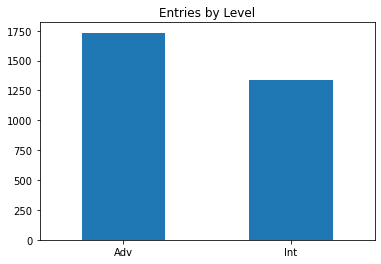

In [52]:
df_vocab['Level'].value_counts().plot(kind='bar', rot=0, title='Entries by Level')
plt.show()